<a href="https://colab.research.google.com/github/SUKHJEET1998/INSE-6220/blob/main/Sukhjeet_INSE_6220_ADV_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (14,12)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [ ]:
# install slim version (default)
!pip install pycaret

In [ ]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Loan Dataset Description**

The "Cleaned_LoanDataset" is a refined dataset related to loans and borrowers, prepared for analysis by removing inconsistencies, missing values, and formatting issues. It likely contains attributes such as loan amount, term, interest rate, loan status, borrower demographics (age, gender, marital status), financial metrics (income, credit score, debt-to-income ratio), and loan purpose.

This dataset can be used for exploratory data analysis, predictive modeling (e.g., predicting loan approvals or defaults), and data visualization to uncover patterns and trends. It serves as a valuable resource for financial institutions or researchers aiming to analyze loan behaviors or optimize lending processes.








In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/SUKHJEET1998/INSE-6220/main/Cleaned_LoanDataset.csv')
df.head(n=25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
5,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
6,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
7,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
8,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
9,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 48.9+ KB


### **Classes**

In [ ]:
y = df['Loan_Status']

In [ ]:
df=df.drop('Loan_ID',axis=1)

### **Features**

Data Matrix

In [ ]:
X = df.drop('Loan_Status', axis=1)
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
5,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2
6,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1
7,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2
8,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
9,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,480.0,0.820833,0.383892,0.0,1.00,1.0,1.00,1.0
Married,480.0,0.647917,0.478118,0.0,0.00,1.0,1.00,1.0
Dependents,480.0,0.777083,1.020815,0.0,0.00,0.0,2.00,3.0
Education,480.0,0.202083,0.401973,0.0,0.00,0.0,0.00,1.0
Self_Employed,480.0,0.137500,0.344734,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


Notice that the data is not standardizd. So we need to standarize it.

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868
1,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774
2,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774
3,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774
4,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774
5,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.535332,-0.024893,-0.618413,0.275542,0.413197,1.259774
6,0.467198,0.737162,2.179863,-0.503253,-0.399275,-0.411178,0.352933,0.164933,0.275542,-2.420153,-0.029547
7,0.467198,0.737162,1.199231,-0.503253,-0.399275,-0.239871,-0.021069,0.289273,0.275542,0.413197,1.259774
8,0.467198,0.737162,0.218599,-0.503253,-0.399275,1.320437,3.589688,2.539838,0.275542,0.413197,-0.029547
9,0.467198,0.737162,1.199231,-0.503253,-0.399275,-0.382215,-0.336943,-0.929265,0.275542,0.413197,1.259774


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,480.0,1.110223e-16,1.001043,-2.140419,0.467198,0.467198,0.467198,0.467198
Married,480.0,-6.291264e-17,1.001043,-1.356553,-1.356553,0.737162,0.737162,0.737162
Dependents,480.0,0.000000e+00,1.001043,-0.762033,-0.762033,-0.762033,1.199231,2.179863
Education,480.0,-1.147230e-16,1.001043,-0.503253,-0.503253,-0.503253,-0.503253,1.987072
Self_Employed,480.0,1.110223e-17,1.001043,-0.399275,-0.399275,-0.399275,-0.399275,2.504541
ApplicantIncome,480.0,2.590520e-17,1.001043,-0.920861,-0.435417,-0.265832,0.086231,13.357679
CoapplicantIncome,480.0,1.572816e-17,1.001043,-0.604633,-0.604633,-0.189905,0.257042,12.335124
LoanAmount,480.0,-1.554312e-16,1.001043,-1.687742,-0.556243,-0.208089,0.314141,5.660787
Loan_Amount_Term,480.0,-2.146431e-16,1.001043,-4.698022,0.275542,0.275542,0.275542,2.117602
Credit_History,480.0,7.586524e-17,1.001043,-2.420153,0.413197,0.413197,0.413197,0.413197


Notice that the data is now standardizd.

**Observations and variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

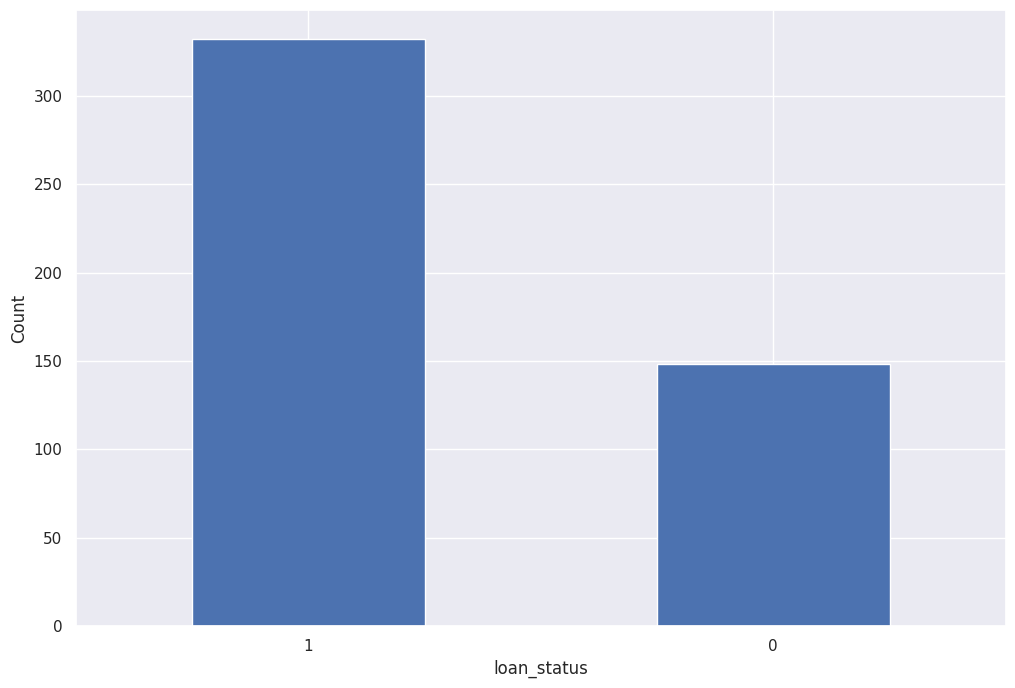

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

<ipython-input-21-4e6743a6f098>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


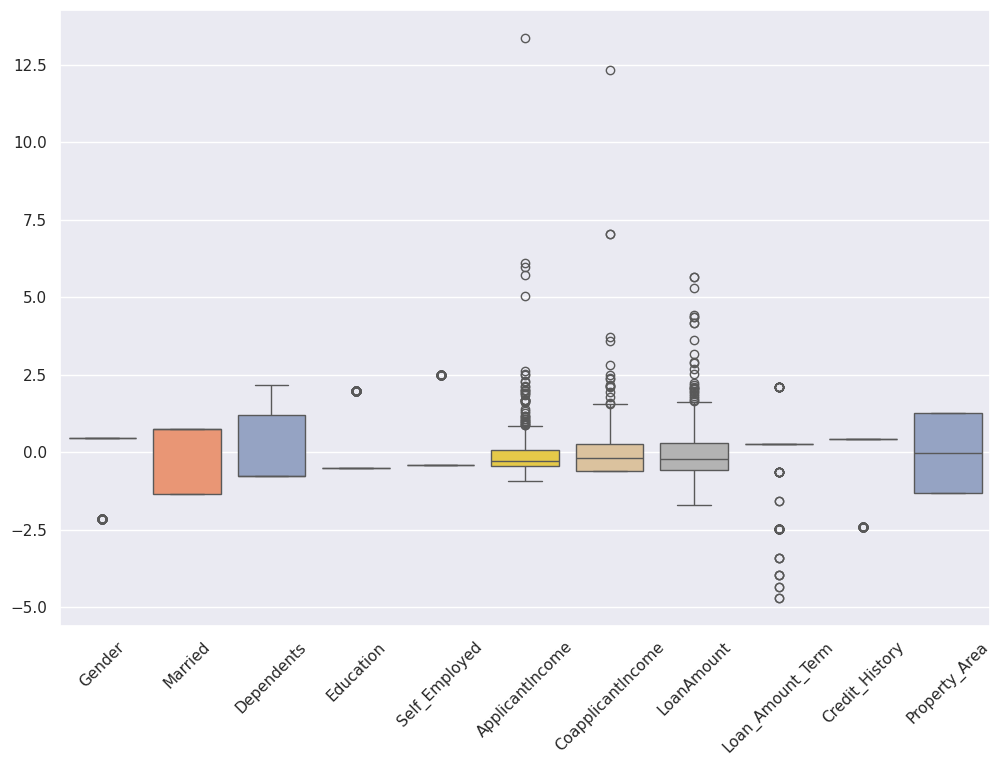

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-23-736b6aedc2e2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


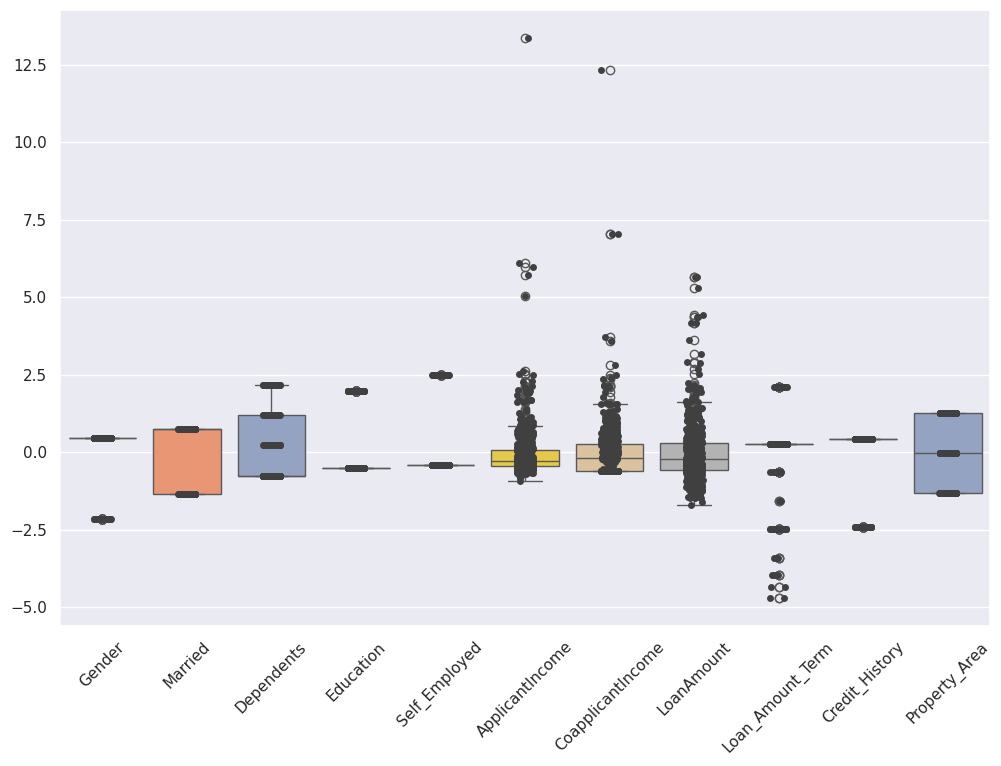

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [ ]:
X.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,4.800000e+02,4.800000e+02,480.000000,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,1.110223e-16,-6.291264e-17,0.000000,-1.147230e-16,1.110223e-17,2.590520e-17,1.572816e-17,-1.554312e-16,-2.146431e-16,7.586524e-17,-8.881784e-17
std,1.001043e+00,1.001043e+00,1.001043,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00
min,-2.140419e+00,-1.356553e+00,-0.762033,-5.032531e-01,-3.992747e-01,-9.208610e-01,-6.046330e-01,-1.687742e+00,-4.698022e+00,-2.420153e+00,-1.318868e+00
25%,4.671982e-01,-1.356553e+00,-0.762033,-5.032531e-01,-3.992747e-01,-4.354171e-01,-6.046330e-01,-5.562428e-01,2.755416e-01,4.131969e-01,-1.318868e+00
50%,4.671982e-01,7.371624e-01,-0.762033,-5.032531e-01,-3.992747e-01,-2.658318e-01,-1.899046e-01,-2.080892e-01,2.755416e-01,4.131969e-01,-2.954695e-02
75%,4.671982e-01,7.371624e-01,1.199231,-5.032531e-01,-3.992747e-01,8.623086e-02,2.570423e-01,3.141413e-01,2.755416e-01,4.131969e-01,1.259774e+00
max,4.671982e-01,7.371624e-01,2.179863,1.987072e+00,2.504541e+00,1.335768e+01,1.233512e+01,5.660787e+00,2.117602e+00,4.131969e-01,1.259774e+00


### Pair Plot

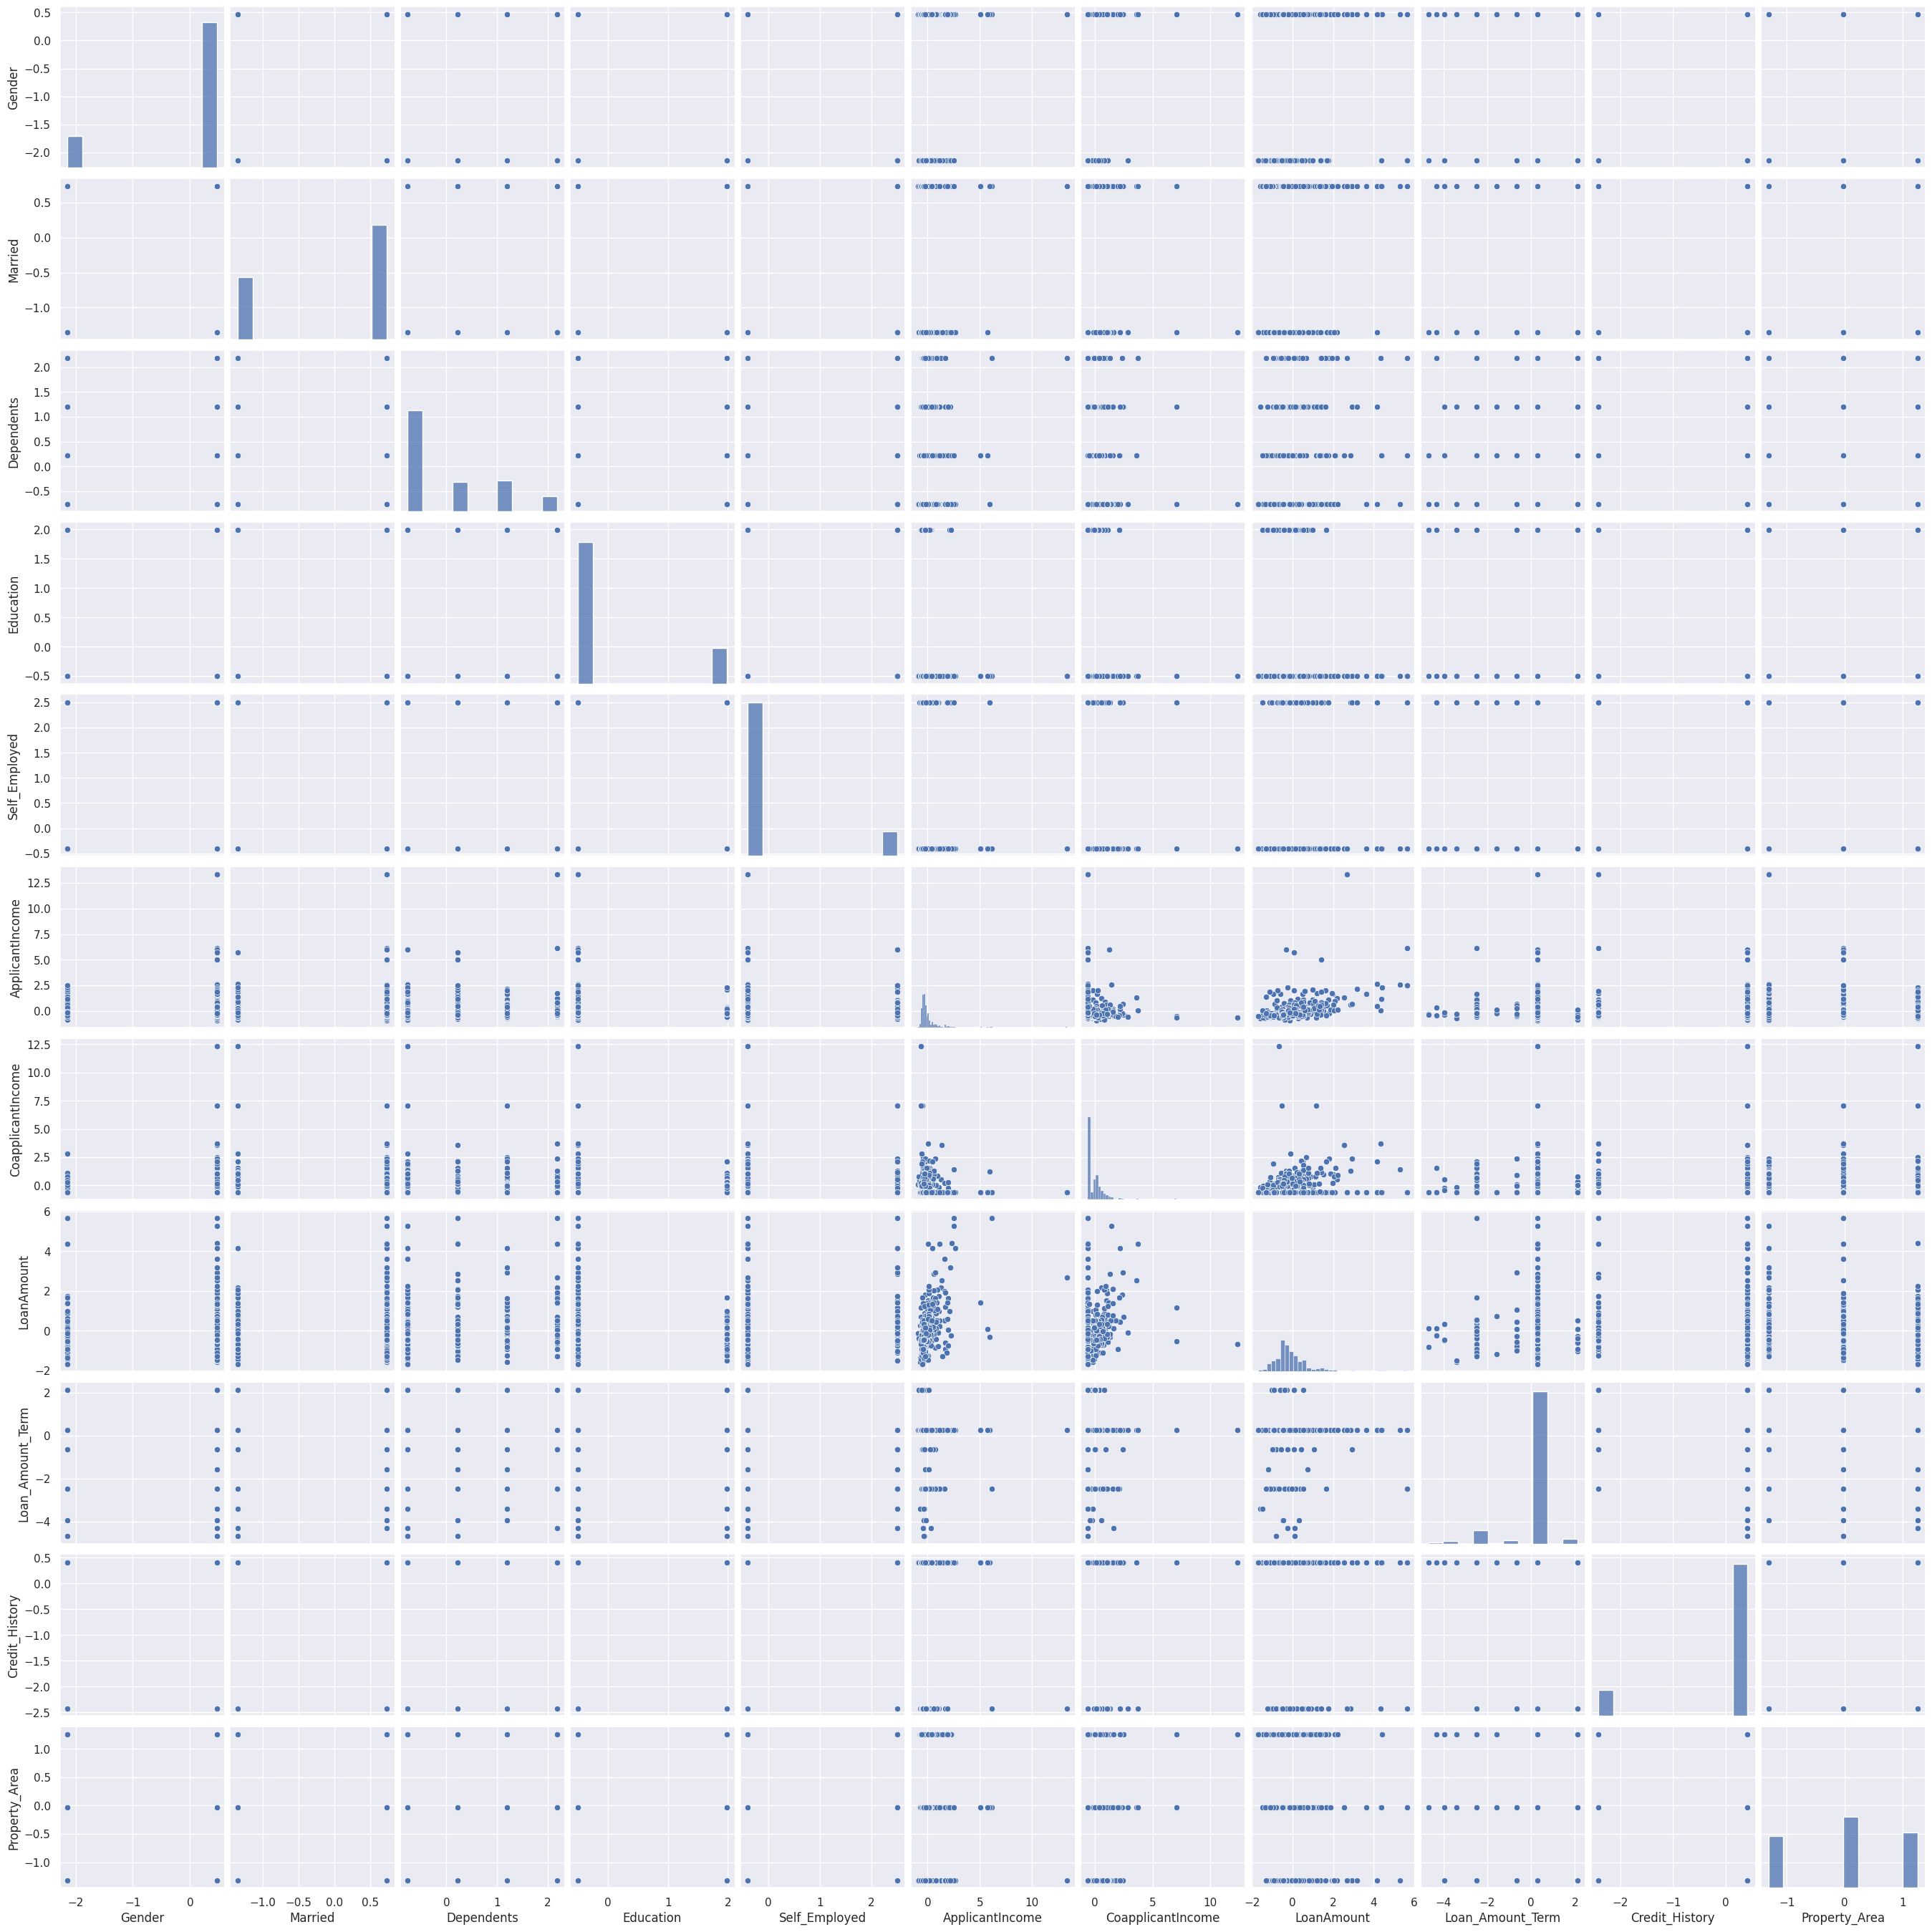

In [ ]:
sns.pairplot(X)

## **Covariance**

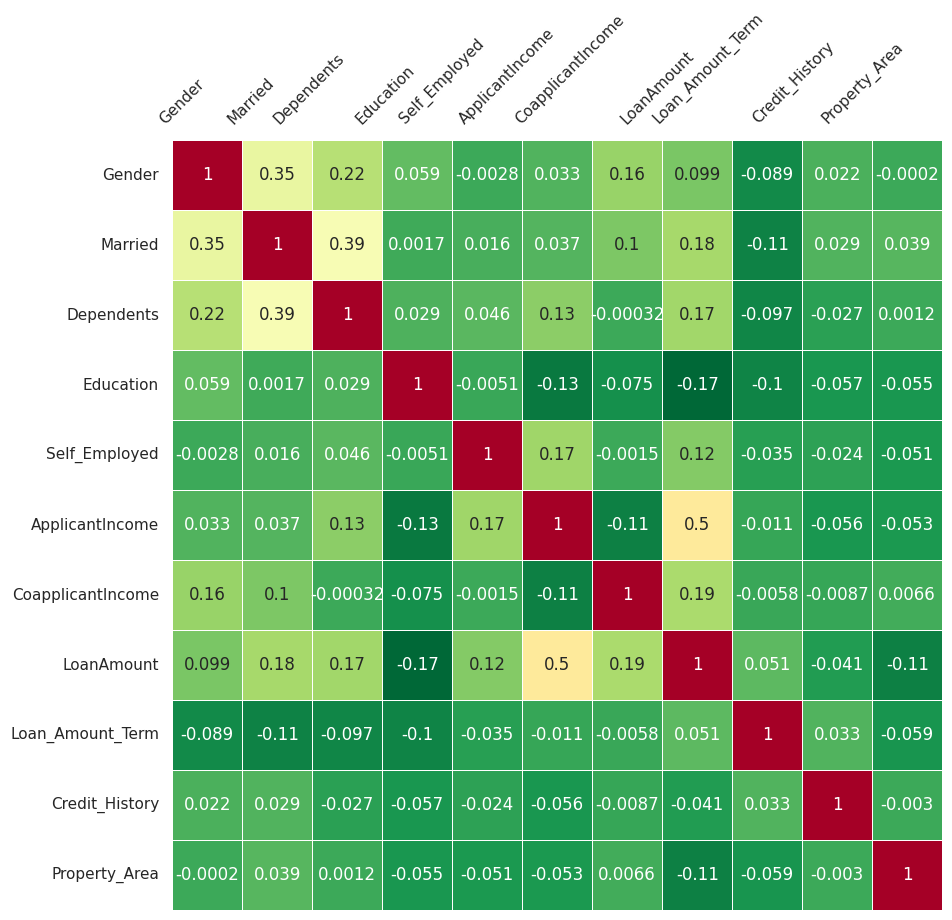

In [ ]:
# Center the data
#dfc = df_std - df_std.mean()  # Use standardized data for centering

# Increase figure size to avoid label overlap
plt.figure(figsize=(15, 10))  # Adjust width (15) as needed
ax = sns.heatmap(X.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels for readability
plt.show()#


## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

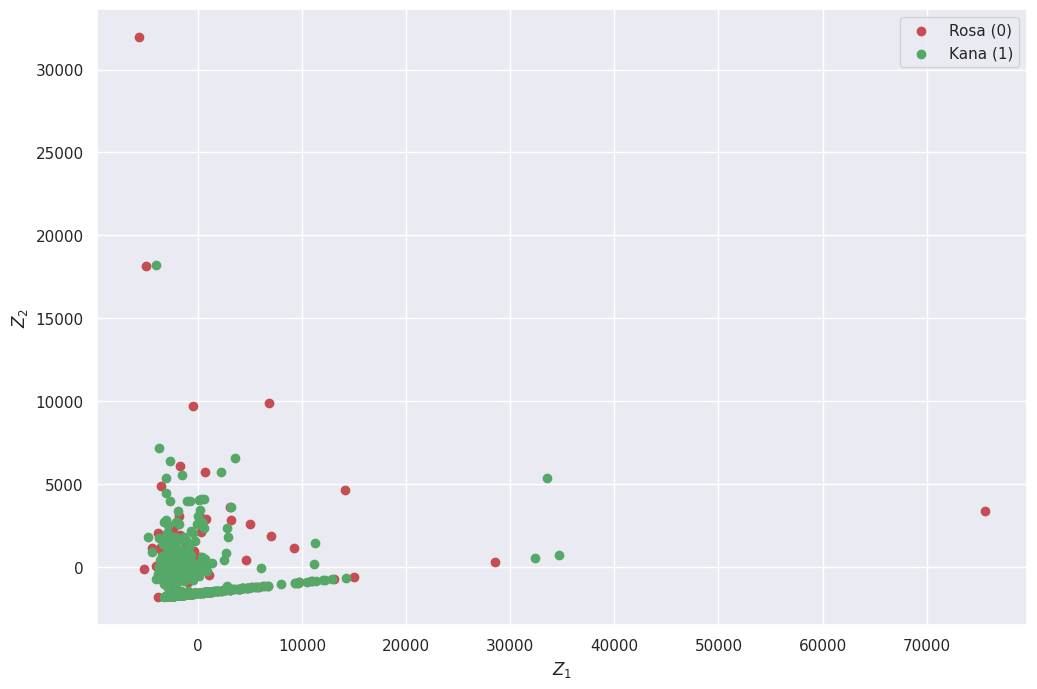

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

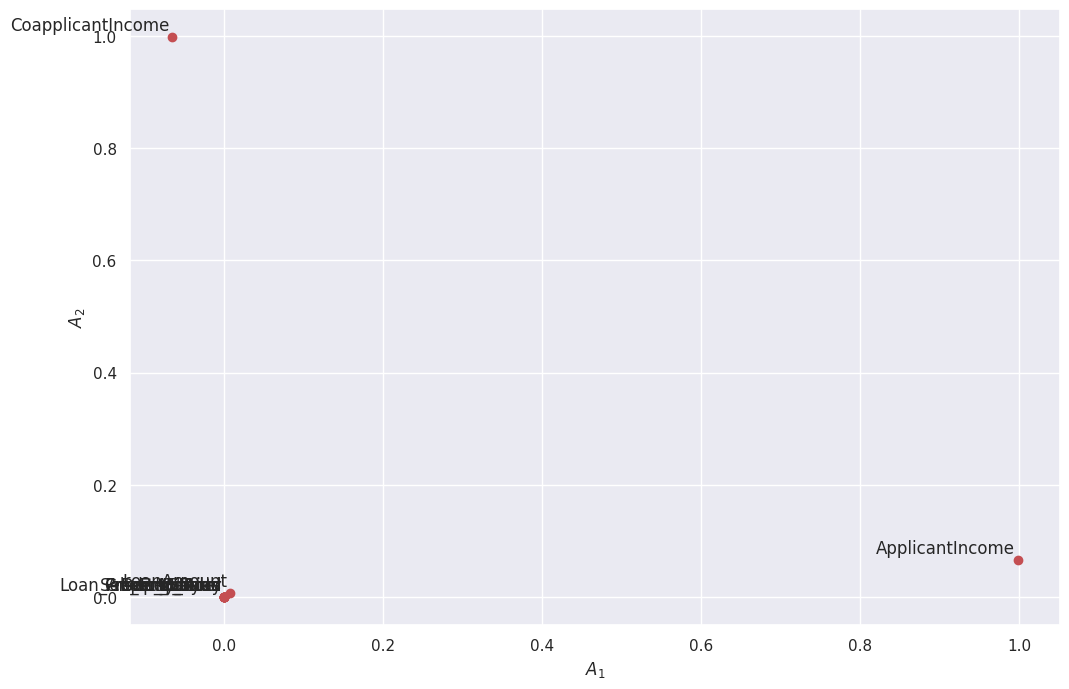

In [ ]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


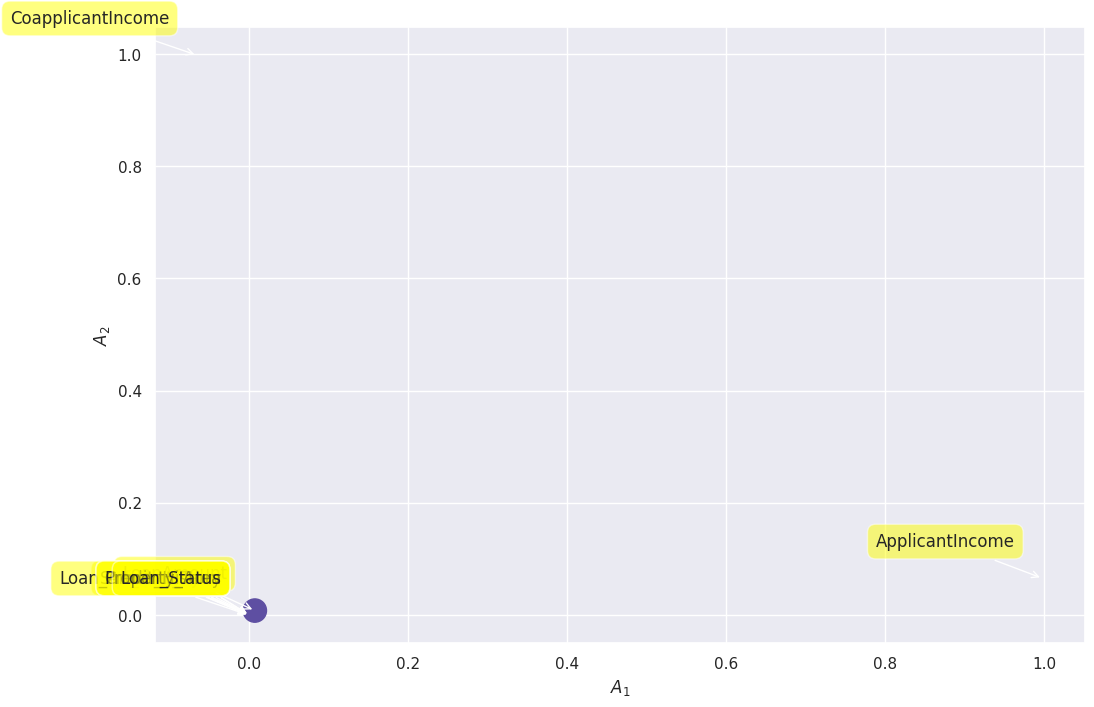

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

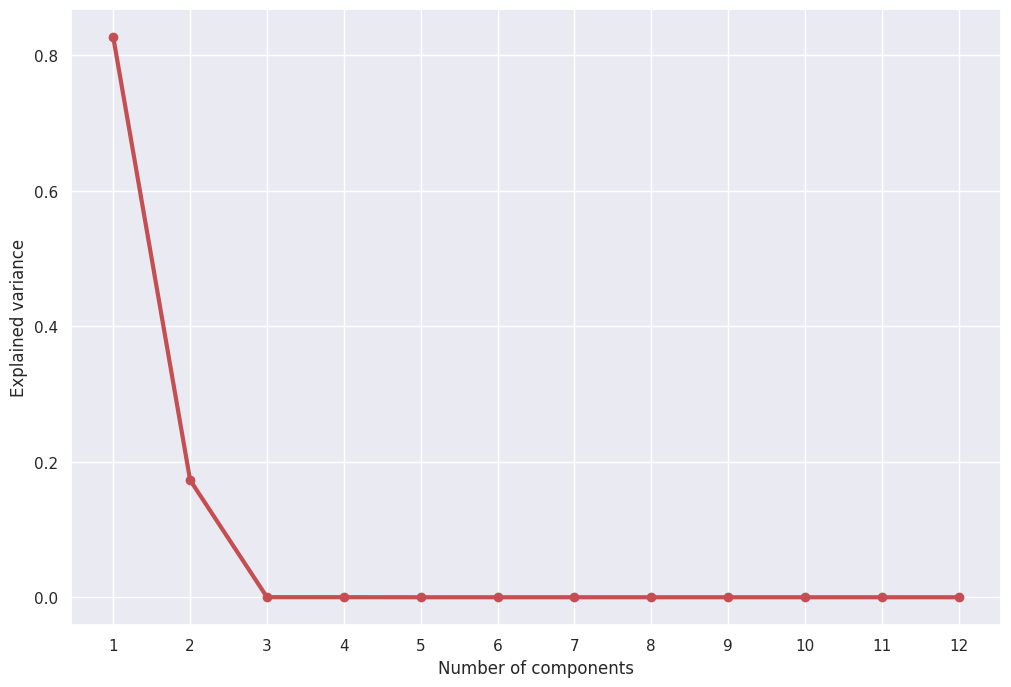

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

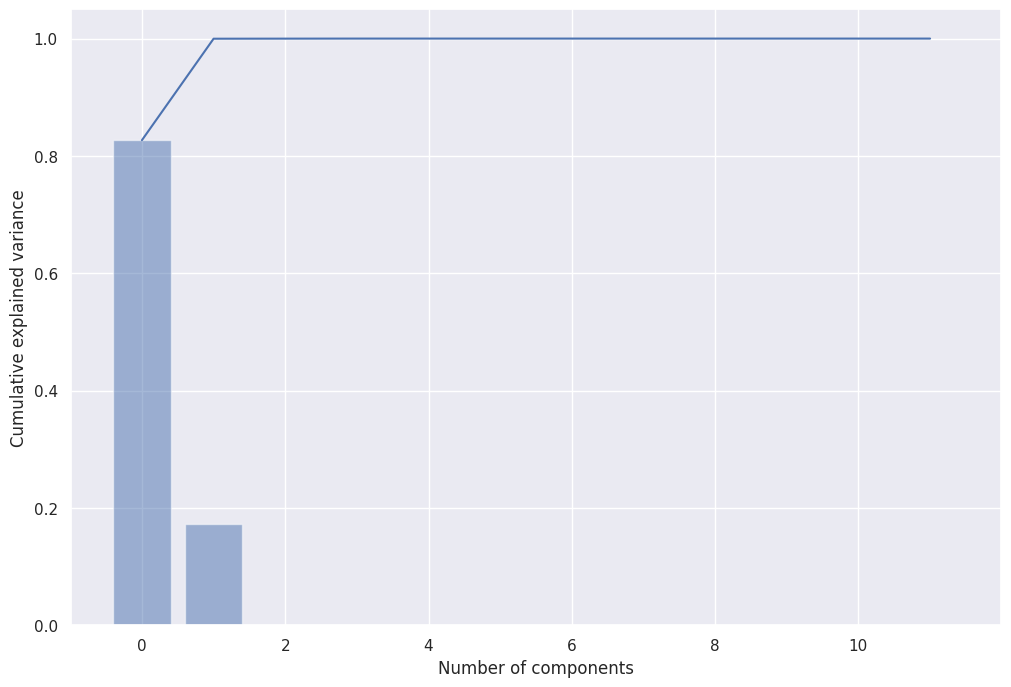

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (82.7%)',
 '1': 'PC 2 (17.3%)',
 '2': 'PC 3 (0.0%)',
 '3': 'PC 4 (0.0%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)',
 '8': 'PC 9 (0.0%)',
 '9': 'PC 10 (0.0%)',
 '10': 'PC 11 (0.0%)',
 '11': 'PC 12 (0.0%)'}

### **Biplot**

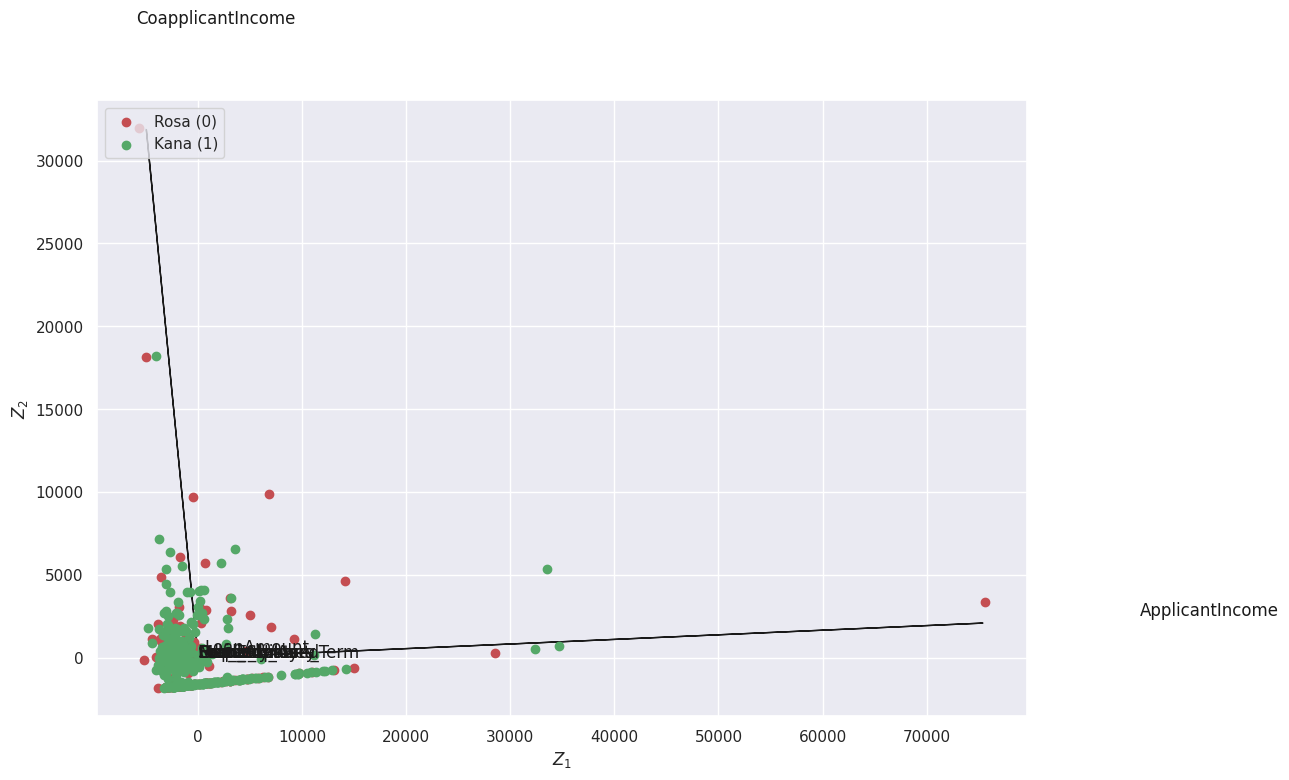

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')

plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

     PC            feature   loading  type
0   PC1    ApplicantIncome  0.997819  best
1   PC2  CoapplicantIncome  0.997813  best
2   PC2             Gender  0.000024  weak
3   PC2            Married  0.000020  weak
4   PC1         Dependents  0.000023  weak
5   PC2          Education -0.000015  weak
6   PC1      Self_Employed  0.000010  weak
7   PC2         LoanAmount  0.008155  weak
8   PC2   Loan_Amount_Term -0.000185  weak
9   PC1     Credit_History -0.000003  weak
10  PC1      Property_Area -0.000007  weak
11  PC2        Loan_Status -0.000010  weak


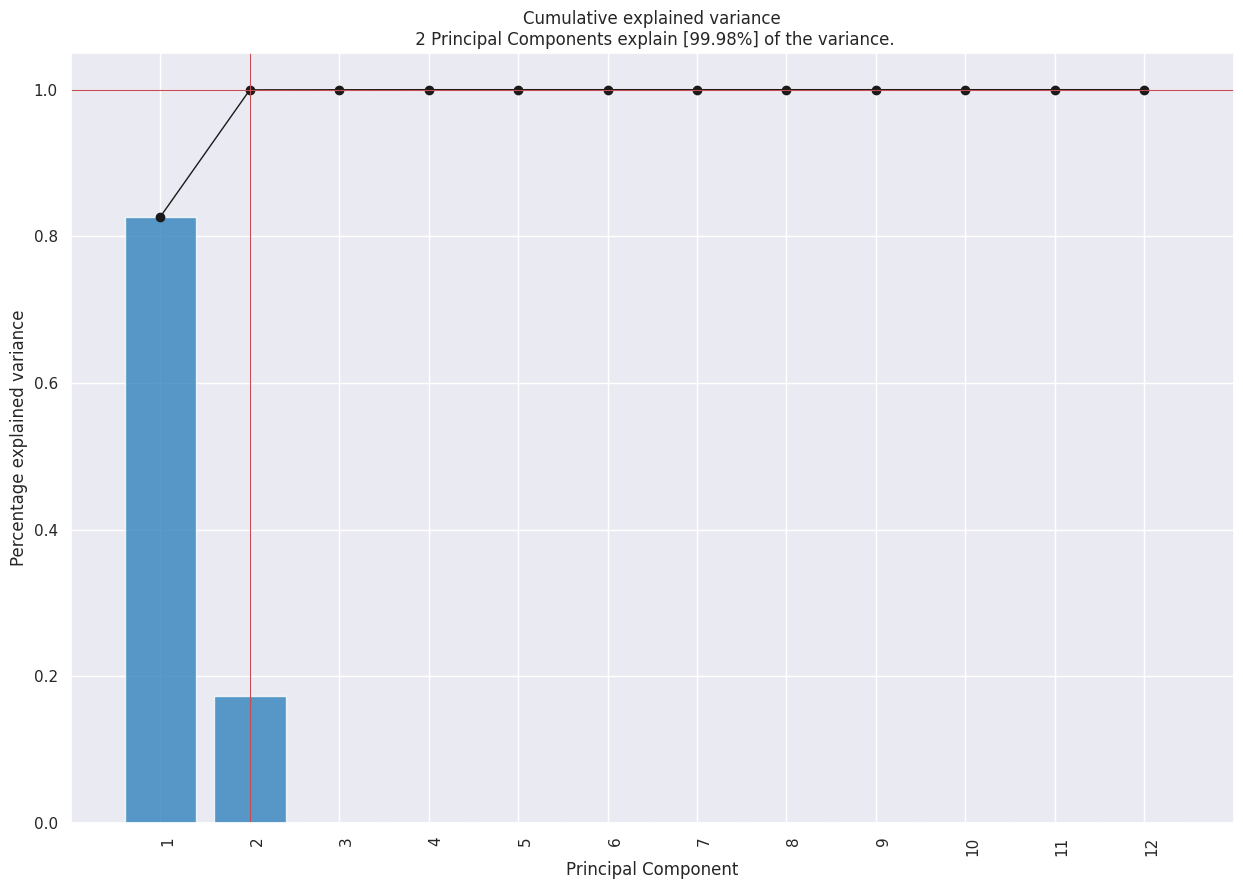

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


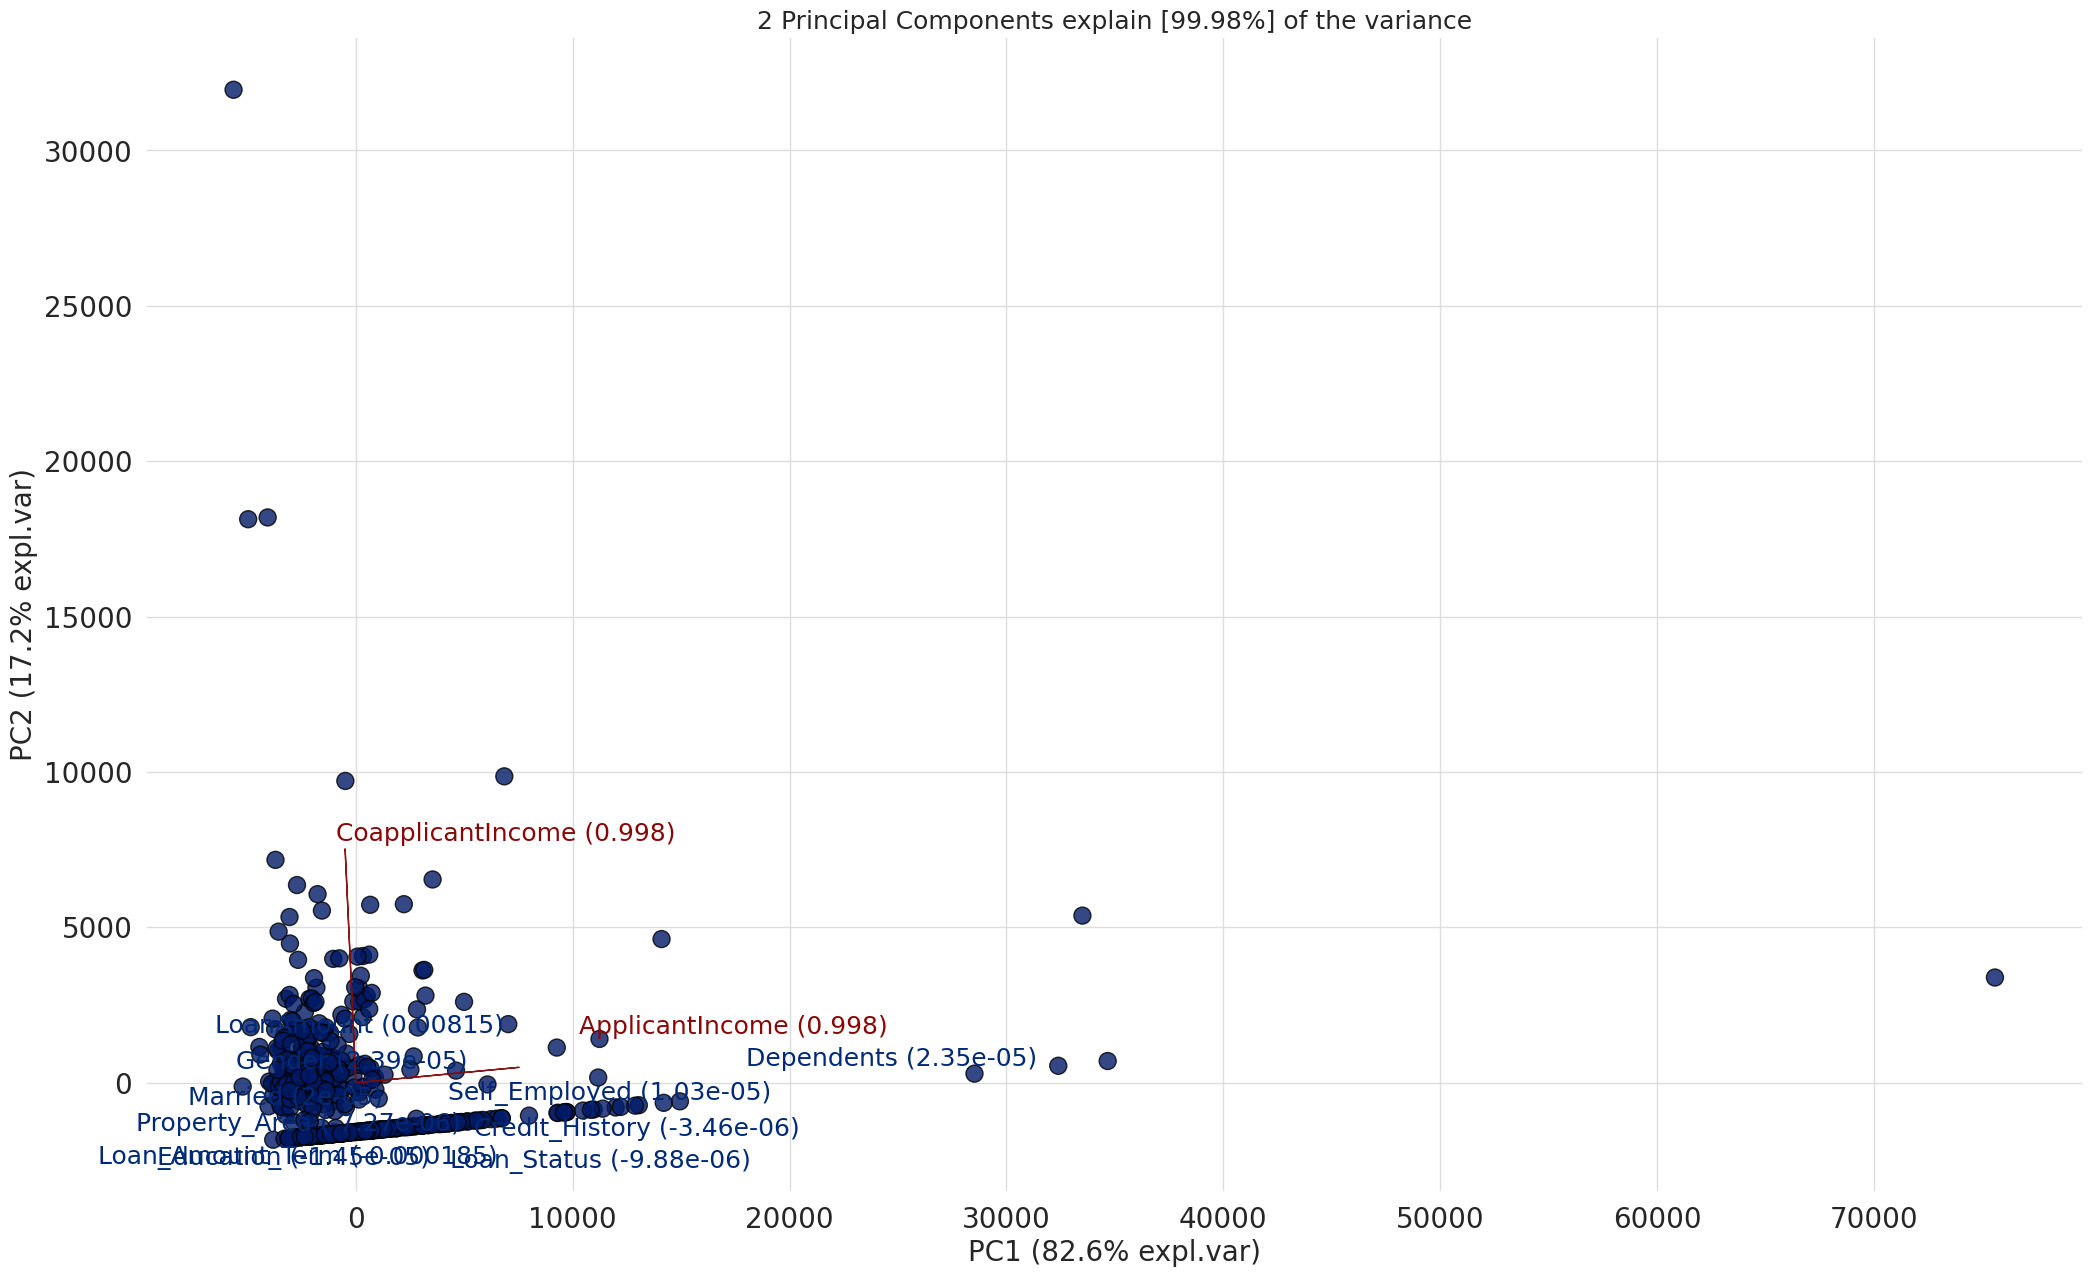

In [ ]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.98%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (17.2% expl.var)'>)

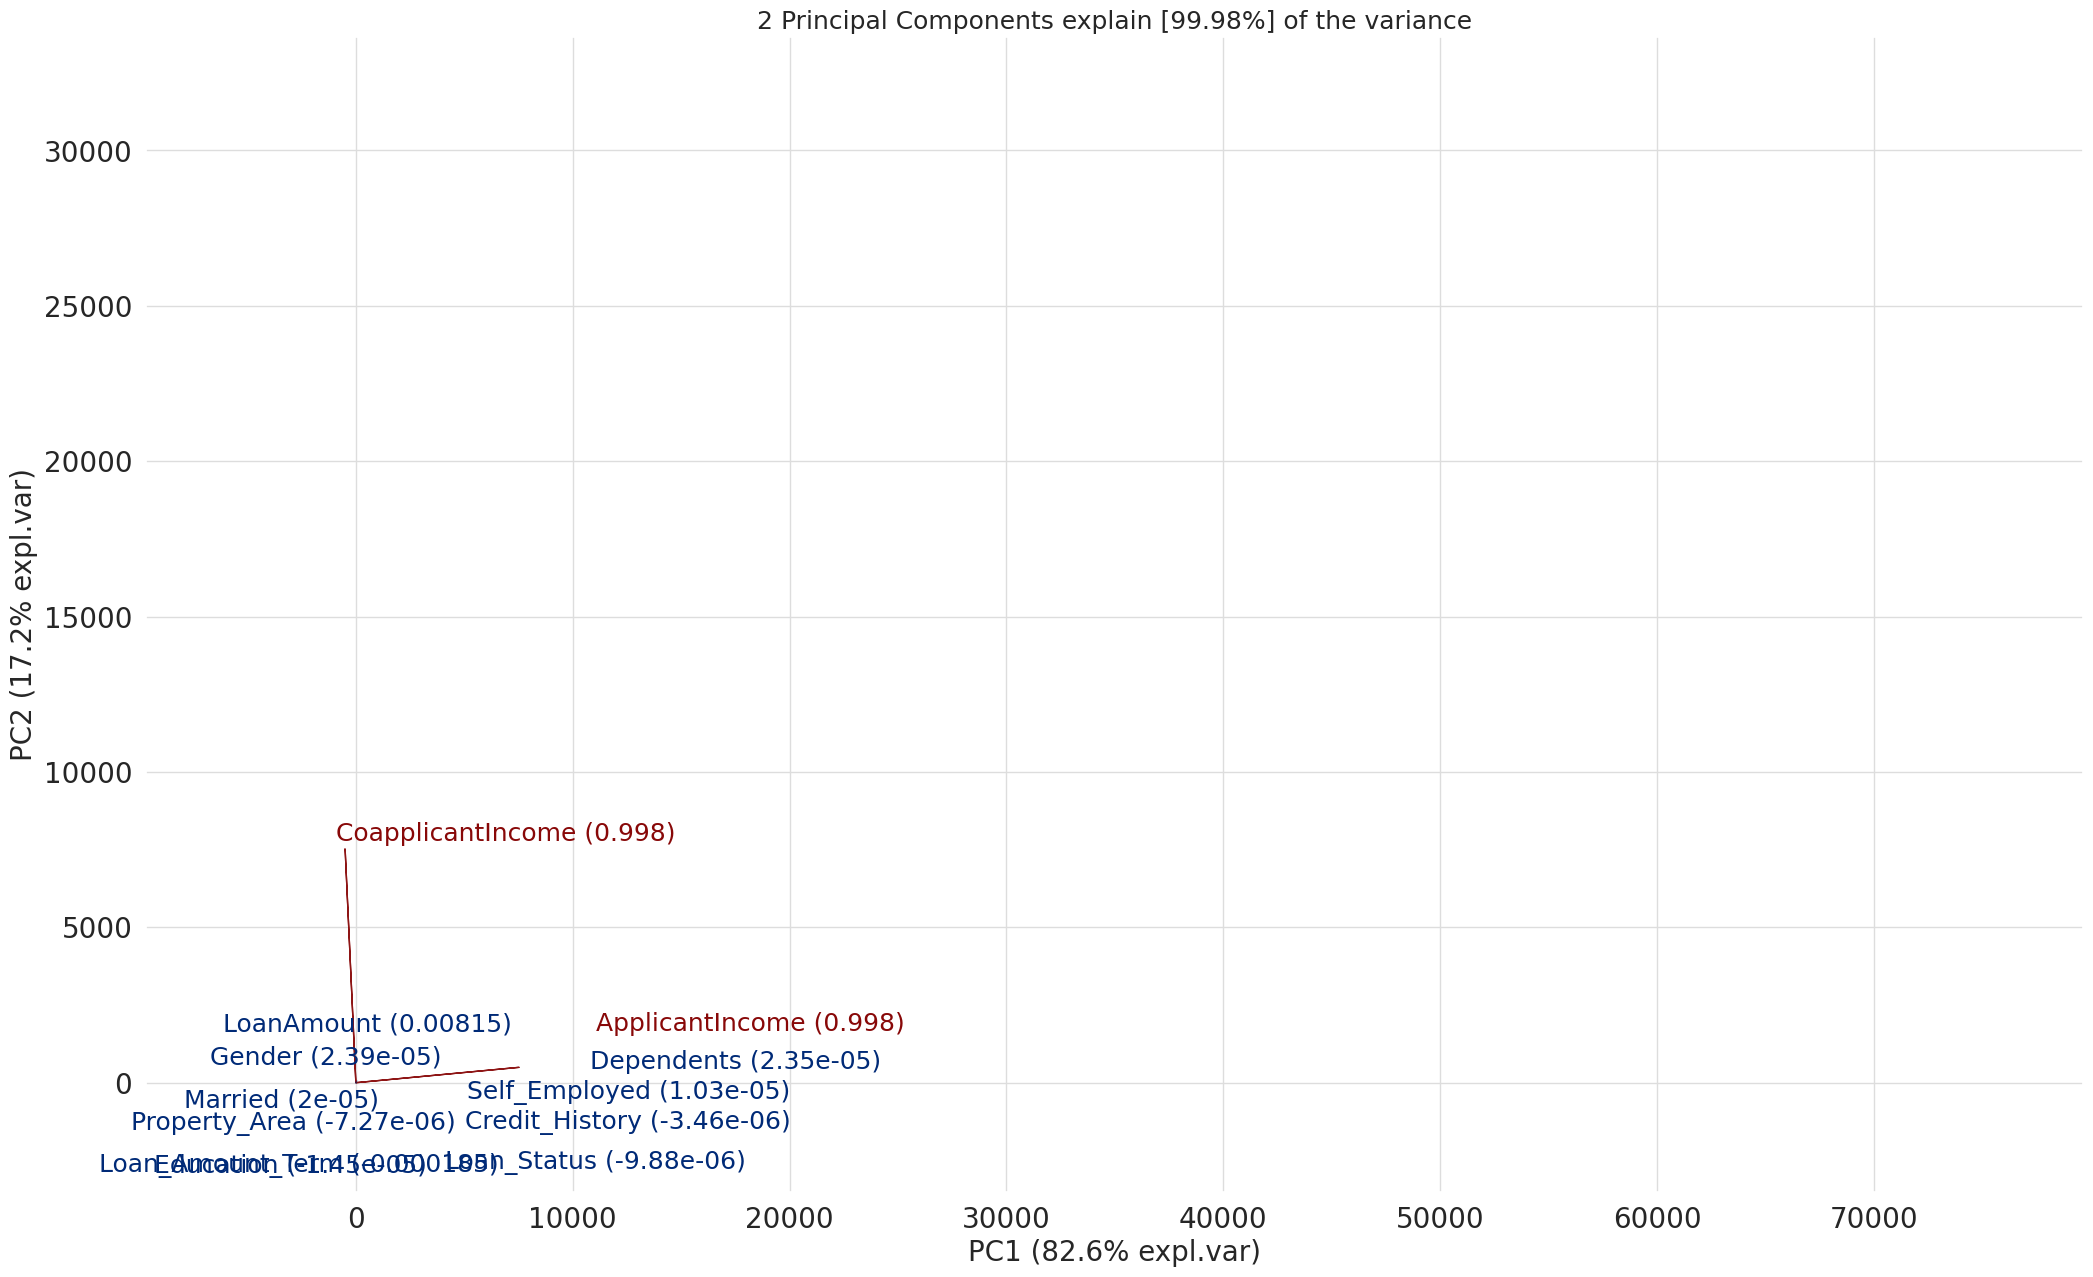

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

### **Principal components**

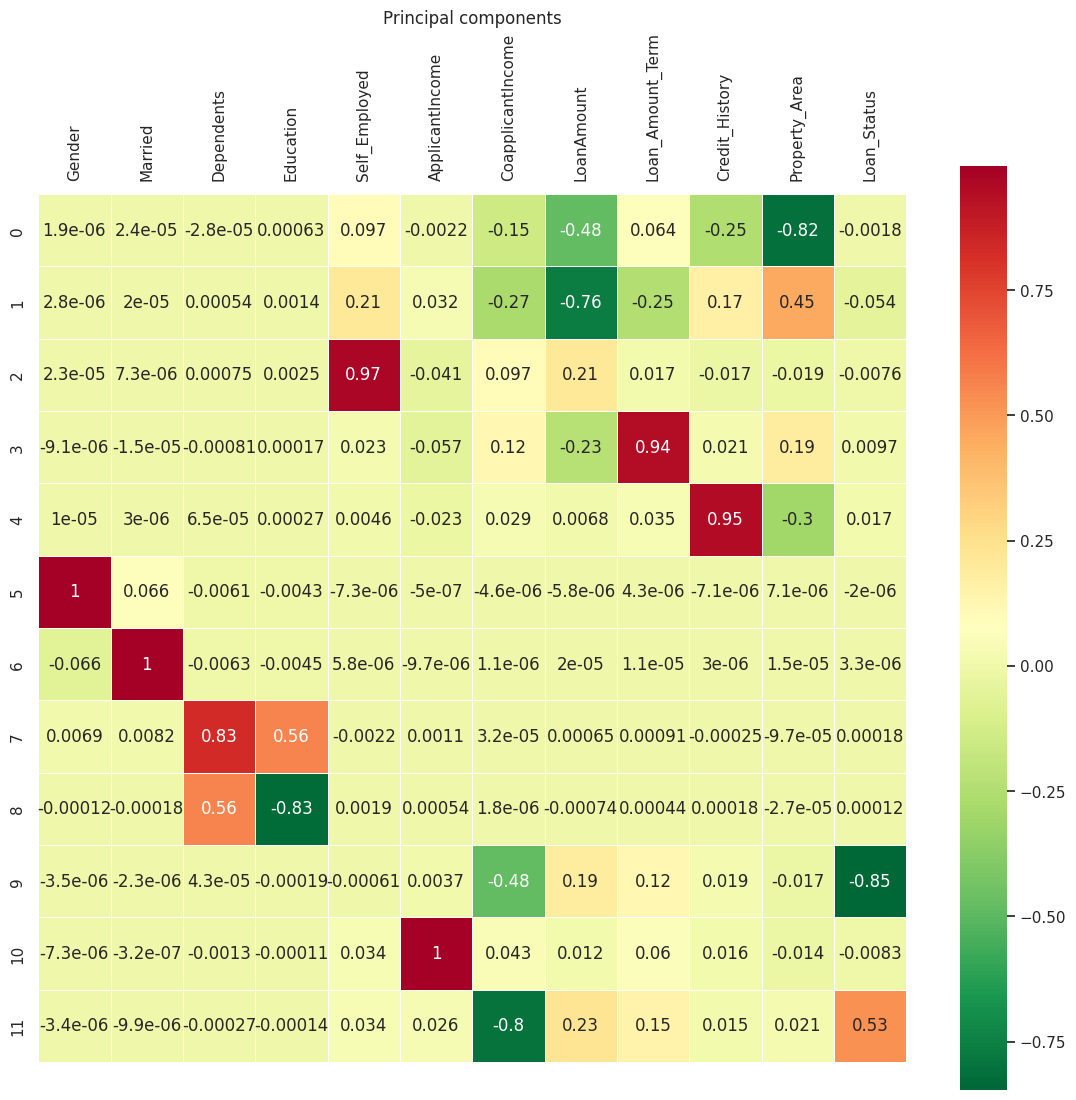

PC1:[ 1.87954015e-06  2.81885095e-06  2.34891546e-05 -9.09147359e-06
  1.03318497e-05  9.97819024e-01 -6.56457411e-02  6.91498422e-03
 -1.21940191e-04 -3.46420333e-06 -7.26911987e-06 -3.37929606e-06]
PC2:[ 2.39185337e-05  2.00438553e-05  7.27254463e-06 -1.45142313e-05
  3.04873659e-06  6.55888329e-02  9.97813392e-01  8.15495697e-03
 -1.84638673e-04 -2.28482260e-06 -3.16996680e-07 -9.88131616e-06]


In [ ]:
comps = pd.DataFrame(A, columns=variables)
sns.heatmap(comps, cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
# Get the current axes object using plt.gca()
ax = plt.gca()
ax.tick_params(labelbottom=False, labeltop=True)

plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

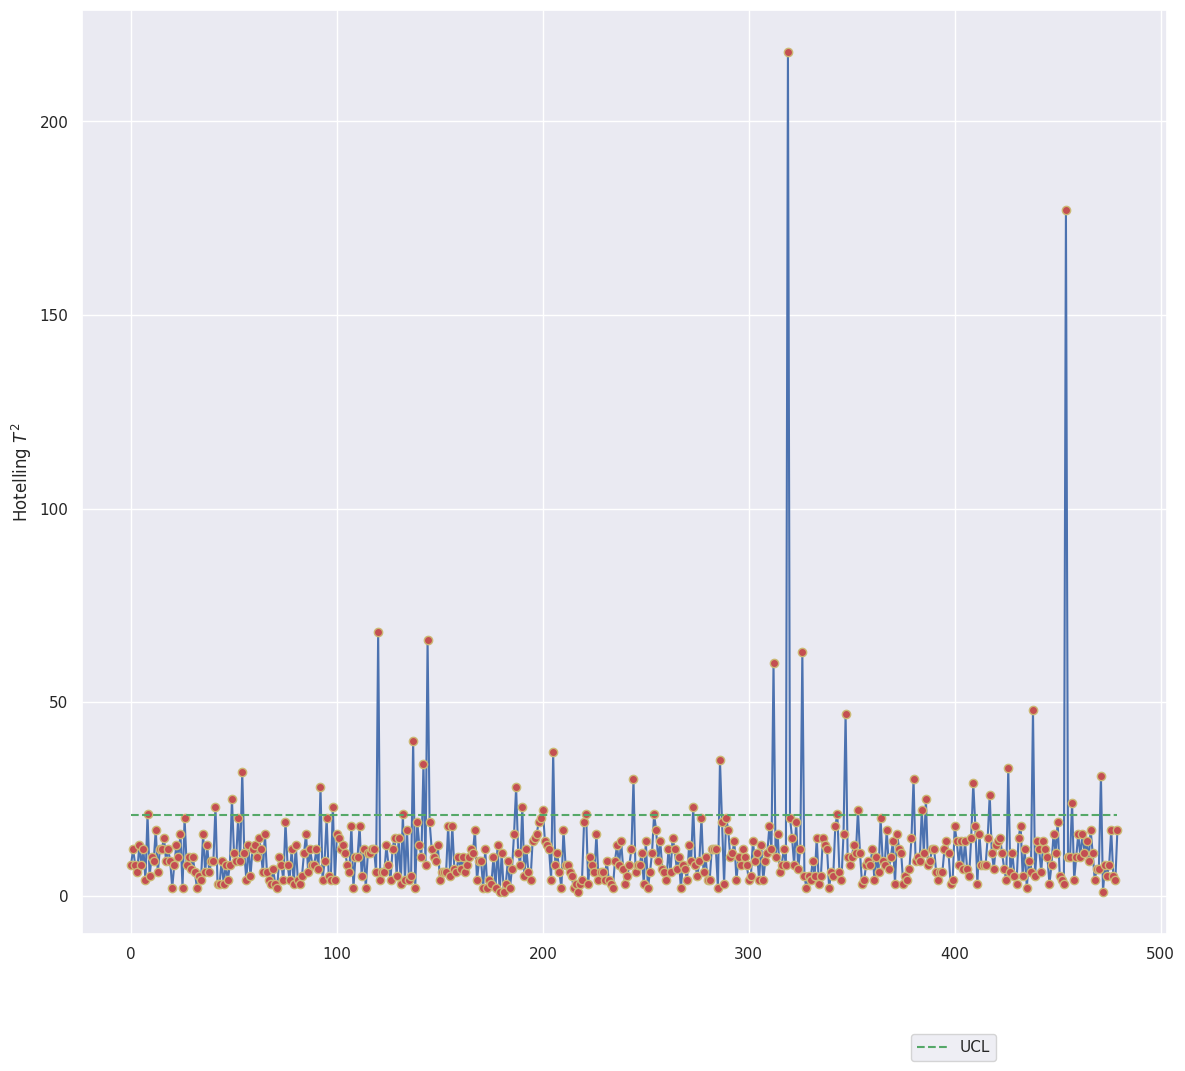

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  8]
 [ 41]
 [ 49]
 [ 54]
 [ 92]
 [ 98]
 [120]
 [132]
 [137]
 [142]
 [144]
 [187]
 [190]
 [200]
 [205]
 [221]
 [244]
 [254]
 [273]
 [286]
 [312]
 [319]
 [326]
 [343]
 [347]
 [353]
 [380]
 [384]
 [386]
 [409]
 [417]
 [426]
 [438]
 [454]
 [457]
 [471]]


### **Control Charts for Principal Components**

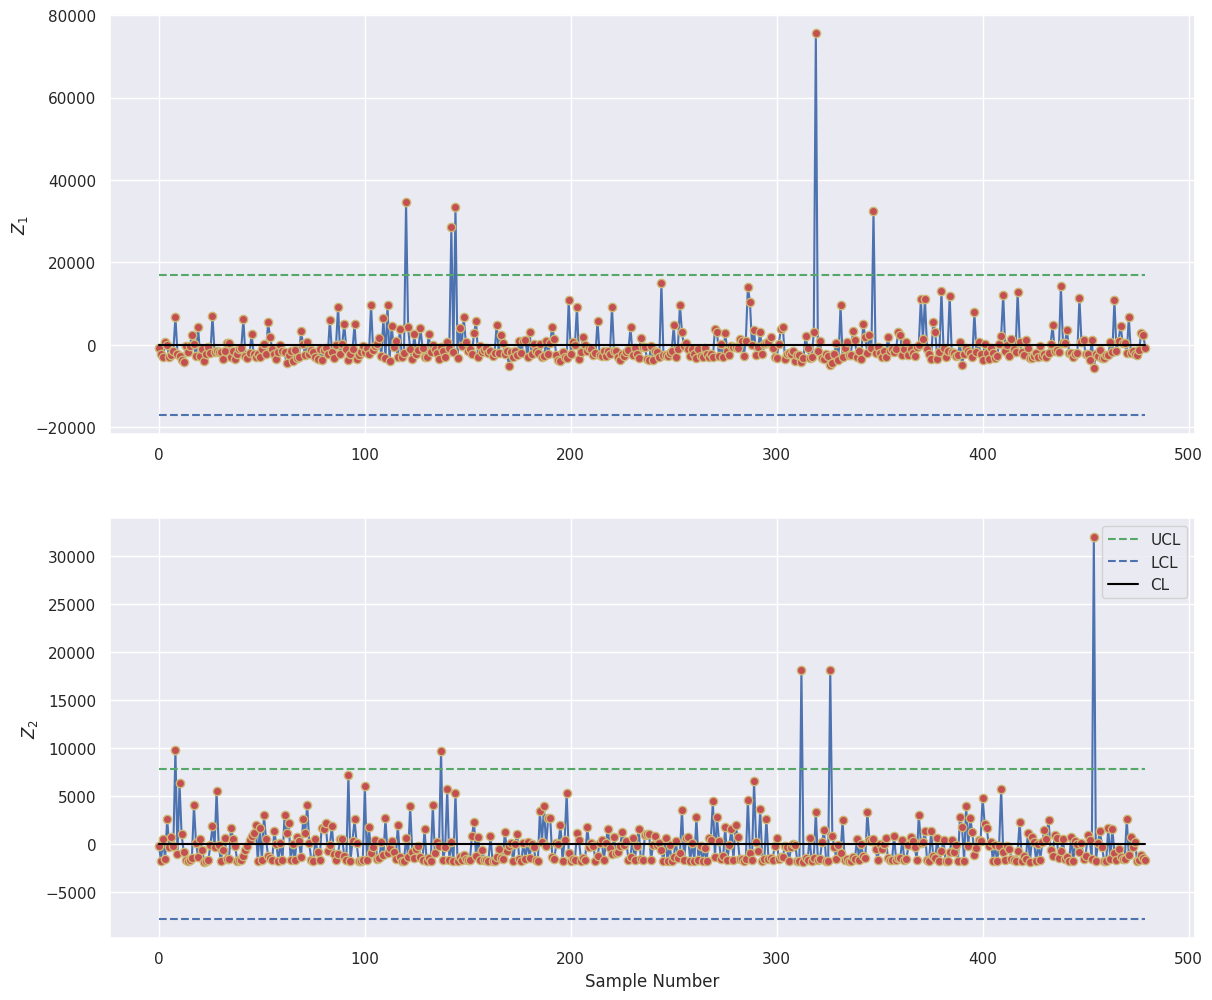

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[120]
 [142]
 [144]
 [319]
 [347]]
[]
[[  8]
 [137]
 [312]
 [326]
 [454]]


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (432, 12)
Unseen Data For Predictions: (48, 12)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Loan_Status', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(432, 12)"
4,Transformed data shape,"(432, 12)"
5,Transformed train set shape,"(302, 12)"
6,Transformed test set shape,"(130, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
 #show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8344,0.7713,0.9762,0.8241,0.8931,0.5347,0.5825,0.0610
lda,Linear Discriminant Analysis,0.8344,0.7697,0.9762,0.8241,0.8931,0.5347,0.5825,0.0510
lr,Logistic Regression,0.8312,0.7742,0.9669,0.8270,0.8902,0.5300,0.5740,1.1330
nb,Naive Bayes,0.8181,0.7828,0.9303,0.8345,0.8785,0.5169,0.5399,0.0780
rf,Random Forest Classifier,0.8147,0.7871,0.9342,0.8297,0.8771,0.5000,0.5279,0.2460
qda,Quadratic Discriminant Analysis,0.8146,0.7542,0.9255,0.8337,0.8755,0.5115,0.5353,0.0290
lightgbm,Light Gradient Boosting Machine,0.8047,0.7629,0.9015,0.8367,0.8663,0.4996,0.5164,0.0870
xgboost,Extreme Gradient Boosting,0.7847,0.7568,0.8877,0.8245,0.8526,0.4481,0.4620,0.1100
gbc,Gradient Boosting Classifier,0.7846,0.7646,0.8972,0.8229,0.8557,0.4303,0.4516,0.1560
ada,Ada Boost Classifier,0.7812,0.6863,0.8868,0.8220,0.8515,0.4320,0.4444,0.1270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

Decision Tree classifier

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6452,0.5530,0.7727,0.7391,0.7556,0.1097,0.1100
1,0.6774,0.6086,0.7727,0.7727,0.7727,0.2172,0.2172
2,0.5667,0.5057,0.6364,0.7368,0.6829,0.0102,0.0104
3,0.7000,0.6761,0.7273,0.8421,0.7805,0.3147,0.3233
4,0.7333,0.6190,0.9048,0.7600,0.8261,0.2727,0.2928
5,0.8333,0.7222,1.0000,0.8077,0.8936,0.5283,0.5991
6,0.7000,0.6270,0.8095,0.7727,0.7907,0.2623,0.2632
7,0.7333,0.7460,0.7143,0.8824,0.7895,0.4366,0.4550
8,0.8667,0.8095,0.9524,0.8696,0.9091,0.6610,0.6707


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.7222,1.0000,0.8148,0.8980,0.5317,0.6018
1,0.8387,0.7222,1.0000,0.8148,0.8980,0.5317,0.6018
2,0.8667,0.7500,1.0000,0.8462,0.9167,0.5946,0.6504
3,0.8667,0.7500,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.7540,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.6667,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7667,0.6429,0.9524,0.7692,0.8511,0.3396,0.3852
7,0.8333,0.7857,0.9048,0.8636,0.8837,0.5902,0.5922
8,0.9000,0.8333,1.0000,0.8750,0.9333,0.7368,0.7638


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

Evaluate DT

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create K Neighbours

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6452,0.6338,0.8636,0.7037,0.7755,-0.0302,-0.0342
1,0.7419,0.6439,0.9545,0.7500,0.8400,0.2201,0.2714
2,0.7000,0.6420,0.9091,0.7407,0.8163,0.0426,0.0503
3,0.7333,0.6108,0.9091,0.7692,0.8333,0.1892,0.2070
4,0.7000,0.5794,0.9048,0.7308,0.8085,0.1509,0.1712
5,0.6000,0.2698,0.8095,0.6800,0.7391,-0.0909,-0.0976
6,0.6333,0.5000,0.9048,0.6786,0.7755,-0.1224,-0.1750
7,0.6333,0.4206,0.8095,0.7083,0.7556,0.0351,0.0364
8,0.7000,0.6561,0.9524,0.7143,0.8163,0.0816,0.1166


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7097,0.4697,1.0000,0.7097,0.8302,0.0000,0.0000
1,0.7097,0.3939,1.0000,0.7097,0.8302,0.0000,0.0000
2,0.7333,0.4886,1.0000,0.7333,0.8462,0.0000,0.0000
3,0.7333,0.4261,1.0000,0.7333,0.8462,0.0000,0.0000
4,0.7000,0.5688,1.0000,0.7000,0.8235,0.0000,0.0000
5,0.7000,0.4894,1.0000,0.7000,0.8235,0.0000,0.0000
6,0.7000,0.5185,1.0000,0.7000,0.8235,0.0000,0.0000
7,0.7000,0.4815,1.0000,0.7000,0.8235,0.0000,0.0000
8,0.7000,0.4444,1.0000,0.7000,0.8235,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate KNN

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Logistic Regression

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.7980,1.0000,0.8148,0.8980,0.5317,0.6018
1,0.8065,0.8030,0.9545,0.8077,0.8750,0.4593,0.4924
2,0.8667,0.8352,1.0000,0.8462,0.9167,0.5946,0.6504
3,0.8667,0.7500,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.8571,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.8466,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7667,0.5608,0.9524,0.7692,0.8511,0.3396,0.3852
7,0.8333,0.7884,0.8571,0.9000,0.8780,0.6154,0.6172
8,0.9000,0.9312,1.0000,0.8750,0.9333,0.7368,0.7638


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.8030,1.0000,0.8148,0.8980,0.5317,0.6018
1,0.8065,0.8030,0.9545,0.8077,0.8750,0.4593,0.4924
2,0.8667,0.8295,1.0000,0.8462,0.9167,0.5946,0.6504
3,0.8667,0.7386,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.8466,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.8254,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7667,0.5556,0.9524,0.7692,0.8511,0.3396,0.3852
7,0.8333,0.7937,0.8571,0.9000,0.8780,0.6154,0.6172
8,0.9000,0.9259,1.0000,0.8750,0.9333,0.7368,0.7638


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Tuned lr

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8065,0.7475,0.9545,0.8077,0.8750,0.4593,0.4924
1,0.7742,0.7677,0.9091,0.8000,0.8511,0.3922,0.4062
2,0.8333,0.8040,0.9545,0.8400,0.8936,0.5161,0.5394
3,0.8667,0.7614,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.8228,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.7196,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7333,0.6349,0.9048,0.7600,0.8261,0.2727,0.2928
7,0.8000,0.8148,0.8095,0.8947,0.8500,0.5522,0.5585
8,0.9667,0.9444,1.0000,0.9545,0.9767,0.9180,0.9211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.7222,1.0000,0.8148,0.8980,0.5317,0.6018
1,0.8387,0.7222,1.0000,0.8148,0.8980,0.5317,0.6018
2,0.8667,0.7500,1.0000,0.8462,0.9167,0.5946,0.6504
3,0.8667,0.7500,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.7540,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.6667,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7667,0.6429,0.9524,0.7692,0.8511,0.3396,0.3852
7,0.8333,0.7857,0.9048,0.8636,0.8837,0.5902,0.5922
8,0.9000,0.8333,1.0000,0.8750,0.9333,0.7368,0.7638


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate RF

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Tune Best Model

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.7778,1.0000,0.8148,0.8980,0.5317,0.6018
1,0.8387,0.8030,1.0000,0.8148,0.8980,0.5317,0.6018
2,0.8667,0.7955,1.0000,0.8462,0.9167,0.5946,0.6504
3,0.8667,0.7443,1.0000,0.8462,0.9167,0.5946,0.6504
4,0.8333,0.8783,0.9524,0.8333,0.8889,0.5614,0.5819
5,0.8000,0.8360,1.0000,0.7778,0.8750,0.4118,0.5092
6,0.7667,0.5820,0.9524,0.7692,0.8511,0.3396,0.3852
7,0.8333,0.7831,0.9048,0.8636,0.8837,0.5902,0.5922
8,0.9000,0.9418,1.0000,0.8750,0.9333,0.7368,0.7638


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

Evaluate Best Model

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
clf_pca = setup(data=df, target='Loan_Status', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(480, 12)"
4,Transformed data shape,"(480, 3)"
5,Transformed train set shape,"(336, 3)"
6,Transformed test set shape,"(144, 3)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6906,0.5000,1.0000,0.6906,0.8169,0.0000,0.0000,0.0380
qda,Quadratic Discriminant Analysis,0.6818,0.5746,0.9525,0.6967,0.8044,0.0431,0.0838,0.0650
lda,Linear Discriminant Analysis,0.6788,0.5804,0.9654,0.6907,0.8049,0.0096,0.0378,0.0620
ridge,Ridge Classifier,0.6728,0.5804,0.9697,0.6856,0.8030,-0.0248,-0.0377,0.0440
svm,SVM - Linear Kernel,0.6701,0.5258,0.8929,0.7087,0.7843,0.0752,0.0841,0.0420
lr,Logistic Regression,0.6699,0.5805,0.9654,0.6843,0.8005,-0.0293,-0.0411,0.1270
nb,Naive Bayes,0.6667,0.5666,0.9139,0.6966,0.7895,0.0368,0.0614,0.1200
gbc,Gradient Boosting Classifier,0.6637,0.5393,0.8792,0.7063,0.7828,0.0716,0.0778,0.4030
ada,Ada Boost Classifier,0.6635,0.5078,0.8920,0.7030,0.7854,0.0464,0.0422,0.2760
lightgbm,Light Gradient Boosting Machine,0.6281,0.5625,0.8312,0.6912,0.7540,0.0030,0.0002,0.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7059,0.5000,1.0000,0.7059,0.8276,0.0000,0.0000
1,0.7059,0.5000,1.0000,0.7059,0.8276,0.0000,0.0000
2,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
3,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
4,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
5,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
6,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000
7,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000
8,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Explainable AI with Shapely

In [ ]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6176,0.5229,0.8750,0.6774,0.7636,-0.1571,-0.2008
1,0.5588,0.4500,0.7917,0.6552,0.7170,-0.2439,-0.2680
2,0.6176,0.4387,0.8261,0.6786,0.7451,0.0090,0.0097
3,0.5882,0.5079,0.7826,0.6667,0.7200,-0.0393,-0.0412
4,0.6471,0.5534,0.8261,0.7037,0.7600,0.1092,0.1143
5,0.6765,0.5040,0.8696,0.7143,0.7843,0.1614,0.1746
6,0.5758,0.4217,0.7826,0.6667,0.7200,-0.1324,-0.1399
7,0.5758,0.5043,0.6957,0.6957,0.6957,-0.0043,-0.0043
8,0.6364,0.5152,0.7826,0.7200,0.7500,0.0876,0.0886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7059,0.5000,1.0000,0.7059,0.8276,0.0000,0.0000
1,0.7059,0.5000,1.0000,0.7059,0.8276,0.0000,0.0000
2,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
3,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
4,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
5,0.6765,0.5000,1.0000,0.6765,0.8070,0.0000,0.0000
6,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000
7,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000
8,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


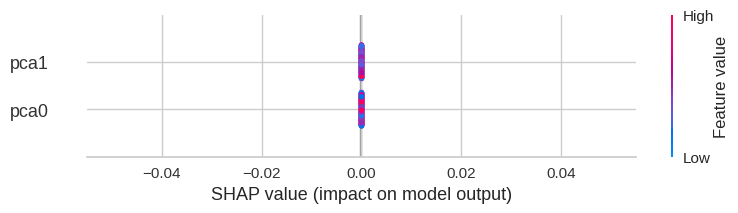

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')